# GA Data Science 18 (DAT18) - HW4 Solutions



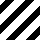
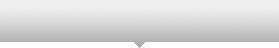
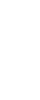
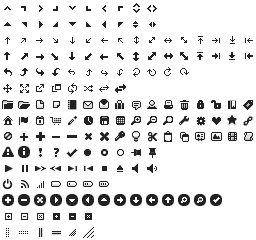
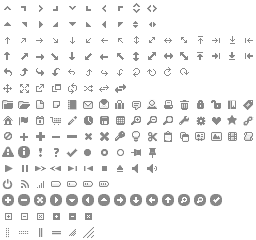
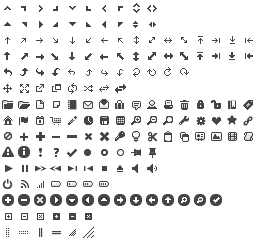
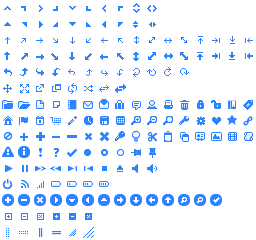
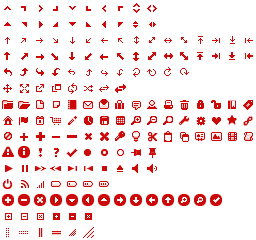
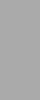
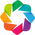
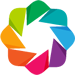
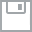
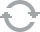
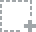
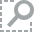
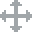
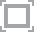
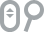

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import Ridge, Lasso

from bokeh.plotting import figure,show,output_notebook
output_notebook()

%matplotlib inline

# Statsmodel APIs
import statsmodels.api as sm

## 1. Projectile

In [2]:
time = np.array([0.0,0.5,1.0,1.5,2.0,2.5])
height = np.array([0.0,20.5,31.36,36.25,30.41,28.23])

p = figure(title="Projectile flying",tools='')
p.circle(x=time,y=height,color='red',size=10)
show(p)

Even without an understanding of physics, we know two things: our y intercept is 0 and the function looks somewhat parabolic.

In [3]:
X = np.c_[time, time**2]

results = sm.OLS(height, X).fit()
v,a = results.params

r2 = results.rsquared

p = figure(title='Projectile Flying',tools='')
p.circle(time,height,color="red",size=10)

x1 = np.array(range(0,35))/float(10)

# For loop:
y1 = []
for val in x1:
    y1.append(val*v + a*val**2)

p.line(x1,y1,color='blue')

show(p)

In [4]:
for s,ft in zip(x1,y1):
    if (1>ft) & (ft> -1):
        print 'Time =',s
        print 'Height =',ft

Time = 0.0
Height = 0.0
Time = 3.3
Height = -0.835371428571


About 3.3 seconds

##2. Healthcare

In [36]:
year = np.array([1976,1980,1987,1993,1998])
cost = np.array([618,860,1324,1865,2256])

p = figure(title="Healthcare Costs are on the rise",tools='')
p.circle(x=year,y=cost,color='red',size=10)
show(p)

Looks linear...  But with an intercept

In [39]:
X = np.c_[year,np.ones(len(year))]

results = sm.OLS(cost,X).fit()
slope,intercept = results.params

r2 = results.rsquared

p = figure(title='Healthcare',tools='')
p.circle(year,cost,color="red",size=10)

x1 = np.array(range(1975,2000))

# For loop:
y1 = []
for val in x1:
    y1.append(val*slope+intercept)

p.line(x1,y1,color='blue')

show(p)

##3. Random!!!

In [44]:
x = np.array([-1,0,1,2,3,5,7,9])
y = np.array([-1,3,2.5,5,4,2,5,4])

p = figure(title="What do we call this?",tools='')
p.circle(x=x,y=y,color='red',size=10)
show(p)

Looks a bit crazy but let's test out regularization.

In [48]:
# Note that this X is the same as np.vander(x,6)
X = np.c_[x**5, x**4, x**3, x**2, x, np.ones(len(x))]
res = sm.OLS(y, X).fit()


ridge = Ridge(alpha = 1)
ridge.fit(X, y)

lasso = Lasso(alpha = 1)
lasso.fit(X, y)

p = figure(title='Regularization Demo')
p.circle(x, y, size=8,color='blue')

xx = np.linspace(-1.25,9.25,100)
p.line(xx, res.predict(np.vander(xx,6)), color='red')
p.line(xx, ridge.predict(np.vander(xx,6)), color='green')
p.line(xx, lasso.predict(np.vander(xx,6)), color='cyan')
show(p)

##Wine Data!!!

In [11]:
data = pd.read_csv('data/winequality-red.csv',header=0,sep=';')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [86]:
feature_names = data.columns[:11]
feature_names

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol'],
      dtype='object')

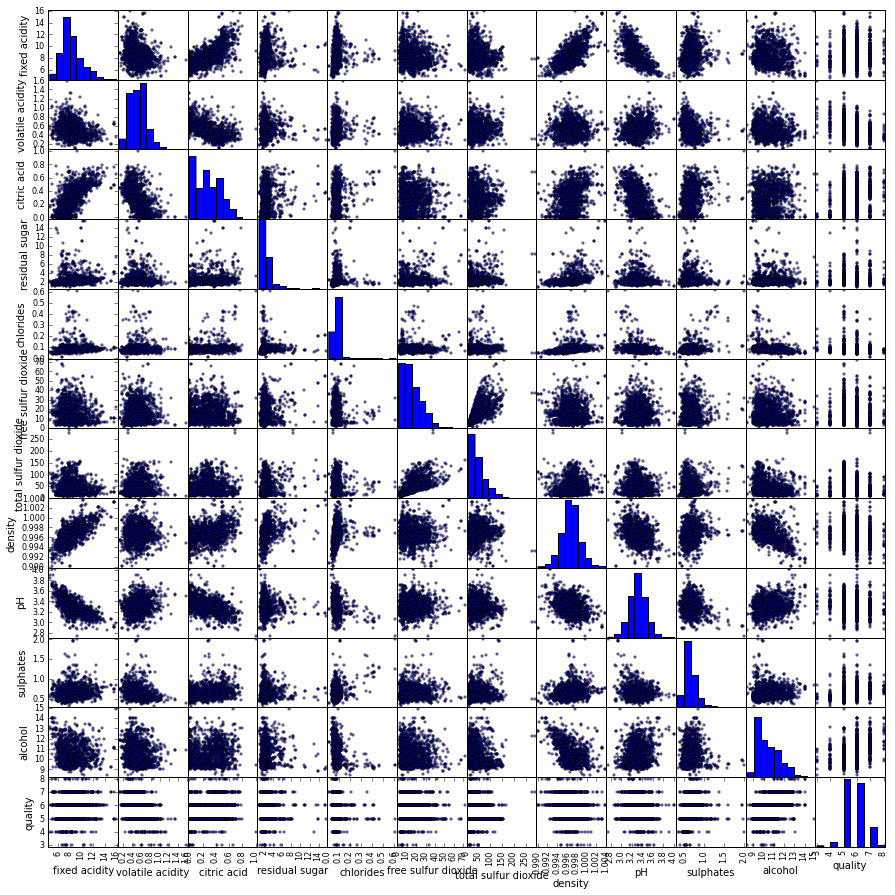

In [13]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (15,15))

There appears to be some correlation with volatile acidity, alcohol and sulfates. Hard to tell though.

Quality of scores are very biased for 5 & 6.

Features are definitely not normalized

In [55]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

In [79]:
# A general linearized model treats each variable as if it's linearly correlated with the target value 

x = data.drop('quality',axis=1).values
y = data.quality.values

X = sm.add_constant(x, prepend=True)
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Wed, 02 Sep 2015   Prob (F-statistic):          1.79e-145
Time:                        19:03:34   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         21.9652     21.195      1.036      0.300       -19.607    63.538
x1             0.0250      0.026      0.963      0.336        -0.026     0.076
x2            -1.0836      0.121     -8.948      0.000        -1.321    -0.846
x3            -0.1826      0.147     -1.240      0.215        -0.471     0.106
x4             0.0163      0.015      1.089      0.276        -0.013     0.046
x5            -1.8742      0.419     -4.470      0.000        -2.697    -1.052
x6             0.0044      0.002      2.009      0.045         0.000     0.009
x7            -0.0033      0.001     -4.480      0.000        -0.005    -0.002
x8           -17.8812     21.633     -0.827      0.409       -60.314    24.551
x9            -0.4137      0.192     -2.159      0.031        -0.789    -0.038
x10            0.9163      0.114      8.014      0.000         0.692     1.141
x11            0.2762      0.026     10.429      0.000         0.224     0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
results.params

array([  2.19652084e+01,   2.49905527e-02,  -1.08359026e+00,
        -1.82563948e-01,   1.63312698e-02,  -1.87422516e+00,
         4.36133331e-03,  -3.26457970e-03,  -1.78811638e+01,
        -4.13653144e-01,   9.16334413e-01,   2.76197699e-01])

Looks like x10, x11, x2, and x5 are the most valuable.

In [128]:
rounded_prediction = []
for val in results.predict(X):
    rounded = round(val,0)
    rounded_prediction.append(rounded)
rounded_prediction

[5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0

In [129]:
p1 = figure(title="Comparing Histograms",x_axis_label = 'Quality Score',y_axis_label = 'Count',tools='')
#construct the histogram
hist, edges = np.histogram(data.quality.values, density=False, bins=range(0,10))
#Construct your x axis
x = np.linspace(0,10,100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],line_color='black')



hist2, edges2 = np.histogram(rounded_prediction, density=False, bins=range(0,10))
p1.quad(top=hist2, bottom=0, left=edges2[:-1], right=edges2[1:],
        line_color='black',
        color='red',
        alpha=0.7)

show(p1)

I will assess the goodness of my model using the r squared value. I'll also seek to gain some insight by generating a histogram of the values to understand more about how our model is predicting quality. 

Let's see if our model improves with rough class balancing.

In [58]:
quality_scores = data.quality.value_counts().index
print quality_scores

Int64Index([5, 6, 7, 4, 8, 3], dtype='int64')


In [64]:
balanced_classes = []

for score in quality_scores:
    
    class_df = data[data.quality == score]
    if len(class_df) > 100:
        class_df = class_df.sample(100)
    balanced_classes.append(class_df)
balanced_data = pd.concat(balanced_classes)
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 1163 to 1505
Data columns (total 12 columns):
fixed acidity           381 non-null float64
volatile acidity        381 non-null float64
citric acid             381 non-null float64
residual sugar          381 non-null float64
chlorides               381 non-null float64
free sulfur dioxide     381 non-null float64
total sulfur dioxide    381 non-null float64
density                 381 non-null float64
pH                      381 non-null float64
sulphates               381 non-null float64
alcohol                 381 non-null float64
quality                 381 non-null int64
dtypes: float64(11), int64(1)
memory usage: 38.7 KB


In [65]:
balanced_data.quality.value_counts()

7    100
6    100
5    100
4     53
8     18
3     10
dtype: int64

In [99]:
x = balanced_data.drop('quality',axis=1).values
y = balanced_data.quality.values

X = sm.add_constant(x, prepend=True)
bal_results = sm.OLS(y, X).fit()
bal_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     34.32
Date:                Wed, 02 Sep 2015   Prob (F-statistic):           5.32e-50
Time:                        19:29:15   Log-Likelihood:                -475.54
No. Observations:                 381   AIC:                             975.1
Df Residuals:                     369   BIC:                             1022.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -11.9575     55.279     -0.216      0.829      -120.658    96.743
x1            -0.0716      0.070     -1.016      0.310        -0.210     0.067
x2            -1.6431      0.298     -5.516      0.000        -2.229    -1.057
x3             0.1511      0.387      0.390      0.697        -0.611     0.913
x4            -0.0729      0.045     -1.613      0.108        -0.162     0.016
x5            -4.3120      1.058     -4.074      0.000        -6.393    -2.231
x6             0.0031      0.006      0.513      0.608        -0.009     0.015
x7            -0.0016      0.002     -0.677      0.499        -0.006     0.003
x8            19.2948     56.368      0.342      0.732       -91.548   130.138
x9            -1.6869      0.512     -3.294      0.001        -2.694    -0.680
x10            1.5600      0.357      4.375      0.000         0.859     2.261
x11            0.4679      0.069      6.828      0.000         0.333     0.603
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.589
Skew:                          -0.084   Prob(JB):                        0.745
Kurtosis:                       2.907   Cond. No.                     9.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
bal_rounded_prediction = []
for val in bal_results.predict(X):
    rounded = round(val,0)
    bal_rounded_prediction.append(rounded)
bal_rounded_prediction

[5.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 4.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 6.0,
 4.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 4.0,
 5.0,
 5.0,
 4.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 4.0,
 7.0,
 7.0,
 7.0,
 5.0,
 6.0,
 7.0,
 5.0,
 5.0,
 6.0,
 7.0,
 5.0,
 7.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 5.0,
 6.0,
 7.0,
 7.0,
 5.0,
 5.0,
 6.0,
 5.0,
 7.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 7.0,
 5.0,
 5.0,
 5.0,
 6.0,
 7.0,
 6.0,
 6.0,
 7.0,
 5.0

In [131]:
p1 = figure(title="Comparing Histograms",x_axis_label = 'Quality Score',y_axis_label = 'Count',tools='')
#construct the histogram
hist, edges = np.histogram(data.quality.values, density=False, bins=range(0,10))
#Construct your x axis
x = np.linspace(0,10,100)
#add the bars, scaling the value to the full count of people
p1.quad(top=hist, bottom=0, 
        left=edges[:-1], right=edges[1:],
        line_color='black')

hist2, edges2 = np.histogram(balanced_data.quality.values, density=False, bins=range(0,10))
p1.quad(top=hist2, bottom=0, 
        left=edges2[:-1], right=edges2[1:],
        line_color='black',color='orange',alpha=0.9)

hist3, edges3 = np.histogram(bal_rounded_prediction, density=False, bins=range(0,10))
p1.quad(top=hist3, bottom=0, 
        left=edges3[:-1], right=edges3[1:],
        line_color='black',color='red',alpha=0.7)


show(p1)

Our R-Squared value increased because we focused less on appeasing the 5, 6, and 7 scores. So it's a plus because our model is more sensitive. A visual representation of that is the histogram of our predicted scores is closer to the actual.

If we wanted a real comparison though, we'd compare the probability distributions of our results to that of the original dataset.



In [132]:
p1 = figure(title="Comparing Histograms: Probability Distributions",
            x_axis_label = 'Quality Score',y_axis_label = 'Count', tools='')
#construct the histogram
hist, edges = np.histogram(data.quality.values, density=True, bins=range(0,10))
#Construct your x axis
x = np.linspace(0,10,100)


p1.quad(top=hist, bottom=0, 
        left=edges[:-1], right=edges[1:],
        line_color='black')

hist3, edges3 = np.histogram(bal_rounded_prediction, density=True, bins=range(0,10))
p1.quad(top=hist3, bottom=0, 
        left=edges3[:-1], right=edges3[1:],
        line_color='black',color='red',alpha=0.6)

show(p1)

In [87]:
#We also have a better understanding of our coefficients.

unbalanced_result_params = results.params
unbalanced_result_pvalues = results.pvalues

for name,r,p in zip(feature_names,unbalanced_result_params,unbalanced_result_pvalues):
    if p <0.006:
        print name,"Coef: ",r

citric acid Coef:  -1.08359025869
free sulfur dioxide Coef:  -1.8742251581
density Coef:  -0.00326457970307
alcohol Coef:  0.916334412721


In [88]:
balanced_params = bal_results.params
balanced_pvalues = bal_results.pvalues

for name,r,p in zip(feature_names,balanced_params,balanced_pvalues):
    if p <0.006:
        print name,"Coef: ",r

citric acid Coef:  -1.64309460969
free sulfur dioxide Coef:  -4.31199356169
sulphates Coef:  -1.68686601788
alcohol Coef:  1.56002573114


Turns out sulfates are actually rather predictive if we aren't over-weighting the middle scores!




###Regularization:

In [98]:
from sklearn.cross_validation import cross_val_score
ridge = Ridge(alpha = 1)
ridge.fit(X,y)
print ridge.score(X,y)

lasso = Lasso(alpha = 1)
lasso.fit(X,y)
print lasso.score(X,y)

0.496037870527
0.00893872982175


Regularization doesn't improve our model much based on the scores we are generating. If we wanted to be thorough we would train-test-split the data and see how the models scores vs. the test data. 